# Exploratory Data Analysis of Titanic Dataset

### Let’s start with importing required libraries

In [40]:
import numpy as np  # 
import pandas as pd  #preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Now We will read titanic dataset using Pandas read_csv method and explore first 5 rows of the data set.

### You can download this dataset from https://www.kaggle.com/c/titanic

In [41]:
titanic_df = pd.read_csv('titanic.csv')

In [42]:
#No. of rows and columns in dataset
titanic_df.shape

(891, 12)

In [43]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
# To display last 5 rows of the dataset
titanic_df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [45]:
# Print the data to see the available features
print(titanic_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [46]:
#absolute numbers
print(titanic_df["Survived"].value_counts())

#percentages
print(titanic_df["Survived"].value_counts(normalize = True))

0    549
1    342
Name: Survived, dtype: int64
0    0.616162
1    0.383838
Name: Survived, dtype: float64


### Now let’s see some statistical summary of the imported dataset using pandas.describe() method.

In [47]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Count for ‘Age’ column is 714, it means dataset has some missing values. We will have to cleanup the data before I start exploring.

## Data cleanup

### Now let’s get some info on datatypes in the dataset using pandas.info() method. It will give us concise summary of a DataFrame.

In [64]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### I see that there are some missing values in ‘Age’, ‘Cabin’ and ‘Embarked’ columns. I’ll not use ‘Cabin’ which is the most missing and will ignore it.

In [49]:
titanic_cleaned = titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
titanic_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [50]:
titanic_cleaned.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [51]:
titanic_cleaned.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [52]:
# Filling the missing values of age by median age [Middle of all ages]

titanic_cleaned["Age"] = titanic_cleaned["Age"].fillna(titanic_cleaned["Age"].median())

In [53]:
titanic_cleaned.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [13]:
# Let us take another look at the values in dataset again.
titanic_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [54]:
titanic_cleaned.Age.median()

28.0

In [70]:
titanic_cleaned.Fare.max() # Returns the highest value in each column


512.3292

In [71]:
titanic_cleaned.Fare.min() # Returns the lowest value in each column


0.0

In [72]:
titanic_cleaned.Fare.median() # Returns the median of each column


14.4542

In [73]:
titanic_cleaned.Fare.std() # Returns the standard deviation of each column

49.693428597180905

Text(0.5, 1.0, 'Distribution of Survival, (1 = Survived)')

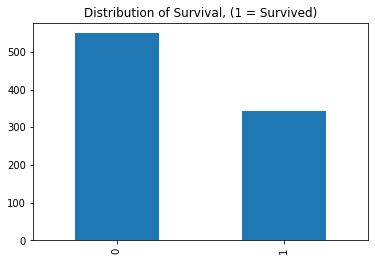

In [60]:

# plots a bar graph of those who surived vs those who did not.               
titanic_cleaned.Survived.value_counts().plot(kind='bar')

# puts a title on our graph
plt.title("Distribution of Survival, (1 = Survived)")

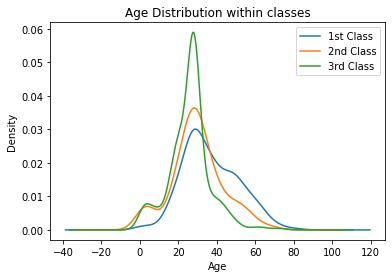

In [56]:
# plots a kernel density estimate of the subset of the 1st class passangers's age
titanic_cleaned.Age[titanic_cleaned.Pclass == 1].plot(kind='kde')    
titanic_cleaned.Age[titanic_cleaned.Pclass == 2].plot(kind='kde')
titanic_cleaned.Age[titanic_cleaned.Pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best')

Text(0.5, 1.0, 'Passengers per boarding location')

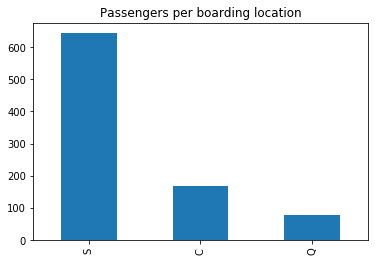

In [63]:
titanic_cleaned.Embarked.value_counts().plot(kind='bar')

# specifies the parameters of our graphs
plt.title("Passengers per boarding location")

Text(0.5, 1.0, 'Class Distribution')

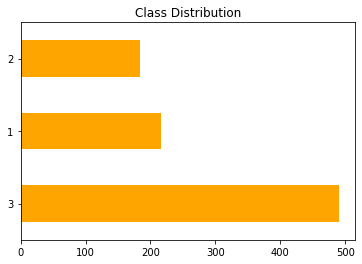